<a href="https://colab.research.google.com/github/devrihartle/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Unit_1_Sprint_3_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unit 1, Sprint 2, Module 1

###Learning Objectives:
- Student can create a scatterplot
- Student can identify the independent and dependent variables in a relationship (also known as features and target, and explanatory and response variables)
- Student can identify linear and nonlinear relationships from a scatterplot
- Student can calculate and interpret linear correlation
- Student can calculate and interpret the slope and intercept of a simple linear regression model
- Sudent can predict a response from a simple linear regression model
- Student can calculate and interpret a residual

#Use the following information to answer questions 1 - 13 in the assignment:



###Is head size related to brain weight in healthy adult humans?

The Brainhead.csv dataset provides information on 237 individuals who were subject to post-mortem examination at the Middlesex Hospital in London around the turn of the 20th century. Study authors used cadavers to see if a relationship between brain weight and other more easily measured physiological characterizes such as age, sex, and head size could be determined. The end goal was to develop a way to estimate a person’s brain size while they were still alive (as the living aren’t keen on having their brains taken out and weighed). 

**We wish to determine if there is a linear relationship between head size and brain weight in healthy human adults.**

Source: R.J. Gladstone (1905). "A Study of the Relations of the Brain to the Size of the Head", Biometrika, Vol. 4, pp105-123.

In [2]:
#Import the Brainhead.csv dataset from a URL and print the first few rows

import pandas as pd
import numpy as np


data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Brainhead/Brainhead.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)

df.head()

,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


The two variables we are interested in - for now - are 

- Brain, the brain weight in g
- Head, the head size in cubic cm

1) If we wish to predict brain weight from head size, which variable is the independent variable (also called the feature, explanatory or x variable) and which variable is the dependent variable (also called the target, response or y variable)?

Answer here: Head size is the independent variable, and brain weight is the dependent variable.

2) Draw a scatterplot showing the relationship between brain weight and head size.  Make sure to graph the correct variable on the correct axis and label your graph.

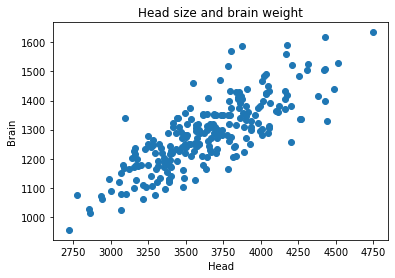

In [3]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.scatter(x=df['Head'], y=df['Brain'])
ax.set_title('Head size and brain weight')
ax.set_xlabel('Head')
ax.set_ylabel('Brain')
plt.show()

3) Describe the strength and direction of the relationship between head size and brain weight.

The relationship seems pretty strong, the larger the head the higher the brain weight. It is a positive relationship. 

4) Determine if there is any missing data in the dataset.

In [4]:
### YOUR CODE HERE ###
df.isnull().sum()

Gender    0
Age       0
Head      0
Brain     0
dtype: int64

There is no missing data in the dataframe.

5) Calculate and interpret the correlation coefficient for the relationship between head size and brain weight.  

In [5]:
### YOUR CODE HERE ###
import numpy as np
r = np.corrcoef(df['Head'], df['Brain'])
print(r)

[[1.         0.79956971]
 [0.79956971 1.        ]]


There is a moderate correlation between head size and brain weight. 

6) Without doing any other calculations, determine the correlation of brain weight with head size.

Answer here: 
.7996

7) Use Python to calculate the slope and intercept terms for the model of head size and brain weight.

In [6]:
### YOUR CODE HERE ###
from statsmodels.formula.api import ols
model = ols('Brain ~ Head', data = df).fit()
model.params

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept    325.573421
Head           0.263429
dtype: float64

8) Use the model output above to write the linear model relating head size to brain weight (ie fill in the b terms with the correct numbers from above).

$$\hat{Y} = b_0 - b_1X$$



𝑌̂ = 325.5-.26x

9) What does the slope term tell us about the relationship between head size and brain weight?

For a 1 unit increase in Head size, we expect the brain to be about .26 G more. 

10) What does the intercept tell us about the relationship between head size and brain weight?

Answer here: 0 is not an x value in the data set, so it does not make sense to interpret it. 

11) Draw a scatterplot with the regression line overlayed on top of the points.

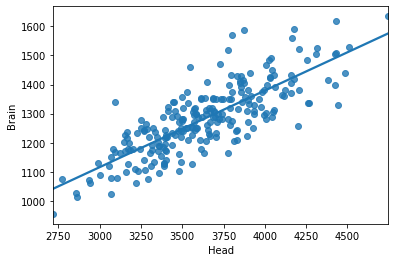

In [7]:
### YOUR CODE HERE ###
import seaborn as sns
ax=sns.regplot(x='Head', y='Brain', data=df, ci=None)

12) A healty human has a brain size of 4100 cubic cm, how much do we expect his or her brain to weigh?

In [8]:
### YOUR CODE HERE ###
x=4100
intercept=model.params[0]
slope=model.params[1]
predict = intercept + slope*x
print(predict)

1405.6337129559786




```
# This is formatted as code
```

1406 grams

13) Calculate and interpret the model residual for for the first observation in the dataset (head size = 4512 cubic cm).

In [13]:
df.head()


,Gender,Age,Head,Brain
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [15]:
### YOUR CODE HERE ###
observed=1530
x=4512
intercept=model.params[0]
slope =model.params[1]
prediect =intercept+slope*x
#print(predict)
residual = observed-predict
print(residual)
print(predict)
print(observed)

124.36628704402142
1405.6337129559786
1530


Answer here: Residual =124.4
Our model underestimated the weight of the brain based on the head size. 

#Use the following information to answer questions 14 - 16 in the assignment:



Import the Sleep.csv dataset from a URL and print the first few rows

Researchers recorded data on sleep duration as well as a set of ecological and constitutional variables  for a selection of mammal species. This data appears in the Sleep.csv dataset. 


Source: Allison, T. and Cicchetti, D. (1976), "Sleep in Mammals: Ecological and Constitutional Correlates",  Science, November 12, vol. 194, pp. 732-734.



Data Dictionary:

| Variable Name |            Description           |                                                                 Details                                                                 |              |   |
|:-------------:|:--------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------:|--------------|---|
| Animal        |            Animal name           |                                                            Character [string]                                                           |    |   |
| Body          |            Body weight           |                                                               Numeric [kg]                                                              |       |   |
| Brain         |           Brain weight           |                                                               Numeric [g]                                                               |  |   |
| SWsleep       | Slow wave (“non-dreaming”) sleep | Numeric [hours]                                                                                                                         |              |   |
| Parasleep     | Paradoxical (“dreaming”) sleep   | Numeric [hours]                                                                                                                         |              |   |
| Totsleep      | Total sleep                      | Numeric [hours]                                                                                                                         |              |   |
| Life          | Maximum life expectancy          | Numeric [years]                                                                                                                         |              |   |
| Gest          | Gestation time                   | Numeric [days]                                                                                                                          |              |   |
| Pred          | Predation index                  | Numeric [1 – 5] 1 = least likely to be preyed upon, 5 = most likely to be preyed upon                                                   |              |   |
| Exposure      | Sleep exposure index             | Numeric [1 – 5] 1 = least amount of exposure during sleep (mammal sleeps indoors or in a den), 5 = most amount of exposure during sleep |              |   |
| Danger        | Overall danger index             | Numeric [ 1 – 5] 1 = least amount of danger from other animals, 5 = most amount of danger from other animals                            |              |   |



In [16]:
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Sleep/Sleep.csv'

sleep = pd.read_csv(data_url, skipinitialspace=True, header=0)

sleep.head()

,Animal,Body,Brain,SWsleep,Parasleep,Totsleep,Life,Gest,Pred,Exposure,Danger
0,African_giant_pouched_rat,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
1,Asian_elephant,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
2,Baboon,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
3,Big_brown_bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
4,Brazilian_tapir,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4


14) Write a function that replaces the _ in each animal name with a space.  Eg. Asian_elephant = Asian elephant.  Hint: use the string.replace(old, new, count) function.

In [22]:
### YOUR CODE HERE ###

sleep.Animal = sleep.Animal.str.replace('_', ' ') 
print("\n\n", sleep) 



                        Animal      Body    Brain  ...  Pred  Exposure  Danger
0   African giant pouched rat     1.000     6.60  ...     3         1       3
1              Asian elephant  2547.000  4603.00  ...     3         5       4
2                      Baboon    10.550   179.50  ...     4         4       4
3               Big brown bat     0.023     0.30  ...     1         1       1
4             Brazilian tapir   160.000   169.00  ...     4         5       4
5                         Cat     3.300    25.60  ...     1         2       1
6                  Chimpanzee    52.160   440.00  ...     1         1       1
7                  Chinchilla     0.425     6.40  ...     5         4       4
8                         Cow   465.000   423.00  ...     5         5       5
9       Eastern American mole     0.075     1.20  ...     1         1       1
10                    Echidna     3.000    25.00  ...     2         2       2
11          European hedgehog     0.785     3.50  ...     2  

15) Plot the relationship between life expectancy and total sleep and gestation time and total sleep.

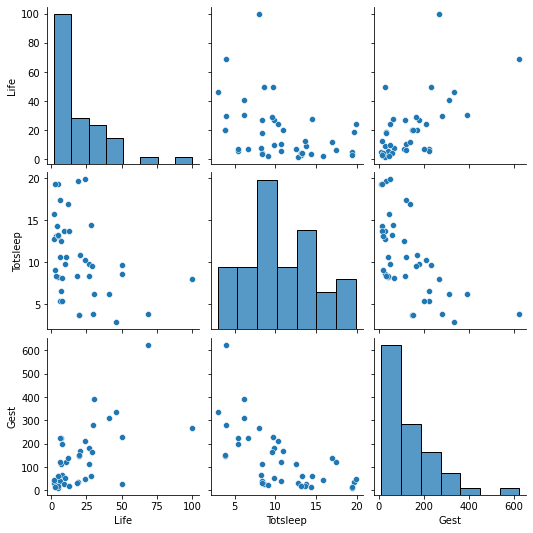

In [23]:
### YOUR CODE HERE ###
to_plot=sleep[['Life', 'Totsleep','Gest']]
sns.pairplot(to_plot)

16) Calculate the correlation between life expectancy and total sleep and between gestation time and total sleep.

In [24]:
### YOUR CODE HERE ###
import numpy as np
r1=np.corrcoef(sleep['Life'], sleep['Totsleep'])
r2=np.corrcoef(sleep['Gest'], sleep['Totsleep'])
print('Correlation between life expectancy and total sleep',r1[0,1])
print('Correlation between gestation and total sleep',r2[0,1])

Correlation between life expectancy and total sleep -0.3824461769490717
Correlation between gestation and total sleep -0.6144743061371066


#Portfolio Project Assignment.

We're coming into the home stretch!  Finalize your project results.  Ask any lingering questions, and complete any revisions you have.  This would be a good time to have a classmate take a look at your project and point out anything missing or any obvious errors (they happen to everyone!).